In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import operator
import math

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [23]:
print("total data instances of each class in data")
data["Species"].value_counts()

total data instances of each class in data


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df = data.values.tolist()

In [7]:
trainingSet,testSet = train_test_split(df,test_size=0.2,random_state=42)

In [8]:
len(trainingSet)

120

In [9]:
len(testSet)

30

In [10]:
trainingSet

[[23, 4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
 [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
 [66, 6.7, 3.1, 4.4, 1.4, 'Iris-versicolor'],
 [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
 [43, 4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [147, 6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
 [52, 6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'],
 [28, 5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
 [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
 [33, 5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
 [143, 5.8, 2.7, 5.1, 1.9, 'Iris-virginica'],
 [86, 6.0, 3.4, 4.5, 1.6, 'Iris-versicolor'],
 [87, 6.7, 3.1, 4.7, 1.5, 'Iris-versicolor'],
 [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
 [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
 [82, 5.5, 2.4, 3.7, 1.0, 'Iris-versicolor'],
 [134, 6.3, 2.8, 5.1, 1.5, 'Iris-virginica'],
 [138, 6.4, 3.1, 5.5, 1.8, 'Iris-virginica'],
 [76, 6.6, 3.0, 4.4, 1.4, 'Iris-versicolor'],
 [110, 7.2, 3.6, 6.1, 2.5, 'Iris-virginica'],
 [97, 5.7, 2.9, 4.2, 1.3, 'Iris-versicolor'],
 [106, 7.6, 3.0, 6.6, 2.1, 'Iris-virginica'],
 [67, 5.6, 3.0, 4.5, 1.5,

In [24]:
count0 =0 
count1 =0
count2 =0
for i in range(len(trainingSet)):
  if(trainingSet[i][5]=="Iris-setosa"):
    count0+=1
  elif(trainingSet[i][5]=="Iris-versicolor"):
    count1+=1
  elif(trainingSet[i][5]=="Iris-virginica"):
    count2+=1
print("total data instances of each class in training data")
print("Iris-setosa          ",count0)
print("Iris-versicolor      ",count1)
print("Iris-virginica       ",count2)

total data instances of each class in training data
Iris-setosa           40
Iris-versicolor       41
Iris-virginica        39


In [26]:
count0 =0 
count1 =0
count2 =0
for i in range(len(testSet)):
  if(trainingSet[i][5]=="Iris-setosa"):
    count0+=1
  elif(trainingSet[i][5]=="Iris-versicolor"):
    count1+=1
  elif(trainingSet[i][5]=="Iris-virginica"):
    count2+=1
print("total data instances of each class in testing data")
print("Iris-setosa          ",count0)
print("Iris-versicolor      ",count1)
print("Iris-virginica       ",count2)

total data instances of each class in testing data
Iris-setosa           13
Iris-versicolor       10
Iris-virginica        7


In [13]:
def euclidean_distance(x,y,row):
	distance = 0.0
	for i in range(len(row[0])-2):
		distance += (float(row[x][i+1]) - float(trainingSet[y][i+1]))**2
	return math.sqrt(distance)

In [14]:
def nearest(y,k,row):
    distances = []
    for x in range(len(row)):
        dist = euclidean_distance(x,y,row)
        distances.append((dist,row[x][5]))
    distances.sort(key=operator.itemgetter(0))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][1])
    return neighbors

In [15]:
def classpred(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [16]:
def Accuracy(testset, predictions):
	correct = 0
	for x in range(len(testset)):
		if testset[x][5] == predictions[x]:
			correct += 1
	return (correct/float(len(testset))) * 100.0

In [17]:
def macrof1(testset, predictions):
  for x in range(len(testset)):
    if (testset[x][5] == "Iris-setosa" and predictions[x] == "Iris-setosa"):
      confusion[0][0]+=1
    elif (testset[x][5] == "Iris-setosa" and predictions[x] == "Iris-versicolor"):
      confusion[1][0]+=1
    elif (testset[x][5] == "Iris-setosa" and predictions[x] == "Iris-virginica"):
      confusion[2][0]+=1
    elif (testset[x][5] == "Iris-versicolor" and predictions[x] == "Iris-setosa"):
      confusion[0][1]+=1 
    elif (testset[x][5] == "Iris-versicolor" and predictions[x] == "Iris-versicolor"):
      confusion[1][1]+=1
    elif (testset[x][5] == "Iris-versicolor" and predictions[x] == "Iris-virginica"):
      confusion[2][1]+=1 
    elif (testset[x][5] == "Iris-virginica" and predictions[x] == "Iris-setosa"):
      confusion[0][2]+=1
    elif (testset[x][5] == "Iris-virginica" and predictions[x] == "Iris-versicolor"):
      confusion[1][2]+=1
    elif (testset[x][5] == "Iris-virginica" and predictions[x] == "Iris-virginica"):
      confusion[2][2]+=1

In [18]:
def f1(confusionm):
  p1=confusionm[0][0]/(confusionm[0][0]+confusionm[0][1]+confusionm[0][2])
  r1=confusionm[0][0]/(confusionm[0][0]+confusionm[1][0]+confusionm[2][0])
  p2=confusionm[1][1]/(confusionm[1][0]+confusionm[1][1]+confusionm[1][2])
  r2=confusionm[1][1]/(confusionm[0][1]+confusionm[1][1]+confusionm[2][1])
  p3=confusionm[2][2]/(confusionm[2][0]+confusionm[2][1]+confusionm[2][2])
  r3=confusionm[2][2]/(confusionm[0][2]+confusionm[1][2]+confusionm[2][2])

  p=(p1+p2+p3)/3
  r=(r1+r2+r3)/3
  score=(2*r*p)/(r+p)
  return score

In [19]:
fold1=trainingSet[0:39]
fold2=trainingSet[40:79]
fold3=trainingSet[80:119]
trainingset1=fold2+fold3
trainingset2=fold1+fold3
trainingset3=fold1+fold2

In [20]:
def euclidean_distance(x,y,row):
	distance = 0.0
	for i in range(len(row[0])-2):
		distance += (float(row[x][i+1]) - float(trainingSet[y][i+1]))**2
	return math.sqrt(distance)

array=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
max=0
kvalue=1
maxf=0
maxfk=1
for i in range(25):
  confusion=[[0,0,0],[0,0,0],[0,0,0]]
  predictions1=[]
  predictions2=[]
  predictions3=[]
  k = i+1

  for x in range(len(fold1)):
      neighbors1 = nearest(x,k,trainingset1)
      result = classpred(neighbors1)
      predictions1.append(result)

  macrof1(fold1,predictions1)    
  accuracy1 = Accuracy(fold1, predictions1)
  

  for x in range(len(fold2)):
      neighbors2 = nearest(x+40,k,trainingset2)
      result = classpred(neighbors2)
      predictions2.append(result)

  macrof1(fold2,predictions2)    
  accuracy2 = Accuracy(fold2, predictions2)
  


  for x in range(len(fold3)):
      neighbors3 = nearest(x+80,k,trainingset3)
      result = classpred(neighbors3)
      predictions3.append(result)

  macrof1(fold3,predictions3)   
  accuracy3 = Accuracy(fold3, predictions3)
  

  s=f1(confusion)
  print("for value of k = ",k," macro f1 score = ",s)
  array[k-1]=s
  accuracy=(accuracy1+accuracy2+accuracy3)/3
  print("for value of k = ",k," accuracy = ",accuracy)
  if(accuracy>max):
    max=accuracy
    kvalue=k
  if(s>maxf):
    maxf=s
    maxfk=k
print(" ")
print("value of k with maximum macrof1score is ",maxfk)
print("value of k with maximum accuracy is ",kvalue)

for value of k =  1  macro f1 score =  0.9568151147098515
for value of k =  1  accuracy =  95.72649572649573
for value of k =  2  macro f1 score =  0.9568151147098515
for value of k =  2  accuracy =  95.72649572649573
for value of k =  3  macro f1 score =  0.94804318488529
for value of k =  3  accuracy =  94.87179487179488
for value of k =  4  macro f1 score =  0.9568151147098515
for value of k =  4  accuracy =  95.72649572649573
for value of k =  5  macro f1 score =  0.9484583392352296
for value of k =  5  accuracy =  94.87179487179488
for value of k =  6  macro f1 score =  0.9568151147098515
for value of k =  6  accuracy =  95.72649572649573
for value of k =  7  macro f1 score =  0.9484583392352296
for value of k =  7  accuracy =  94.87179487179488
for value of k =  8  macro f1 score =  0.9568151147098515
for value of k =  8  accuracy =  95.72649572649573
for value of k =  9  macro f1 score =  0.9576298620270911
for value of k =  9  accuracy =  95.72649572649573
for value of k =  10 

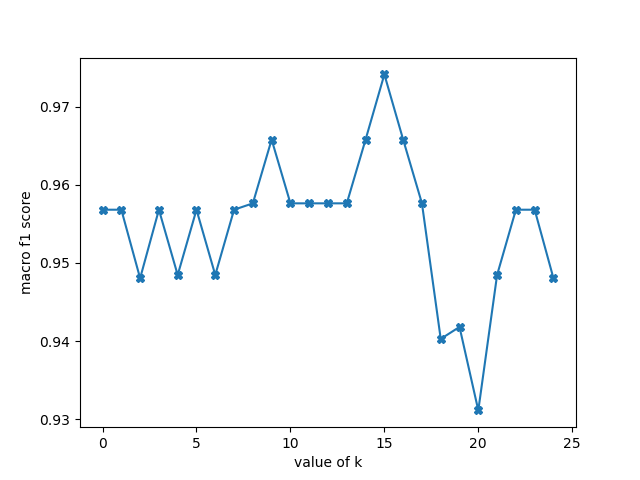

In [21]:
kva=[]
for i in range(25):
  kva.append(i)
plt.xlabel('value of k')
plt.ylabel('macro f1 score')
plt.plot(kva, array,marker="X")
plt.show()

In [22]:
def euclidean_distance(x,y,row):
	distance = 0.0
	for i in range(len(row[0])-2):
		distance += (float(row[x][i+1]) - float(testSet[y][i+1]))**2
	return math.sqrt(distance)

confusion=[[0,0,0],[0,0,0],[0,0,0]]
predictions=[]
for x in range(len(testSet)):
      neighbors = nearest(x,kvalue,trainingSet)
      result = classpred(neighbors)
      predictions.append(result)
macrof1(testSet,predictions) 

accuracy = Accuracy(testSet, predictions)


p1=confusion[0][0]/(confusion[0][0]+confusion[0][1]+confusion[0][2])
r1=confusion[0][0]/(confusion[0][0]+confusion[1][0]+confusion[2][0])
p2=confusion[1][1]/(confusion[1][0]+confusion[1][1]+confusion[1][2])
r2=confusion[1][1]/(confusion[0][1]+confusion[1][1]+confusion[2][1])
p3=confusion[2][2]/(confusion[2][0]+confusion[2][1]+confusion[2][2])
r3=confusion[2][2]/(confusion[0][2]+confusion[1][2]+confusion[2][2])
p=(p1+p2+p3)/3
r=(r1+r2+r3)/3
s1=(2*r1*p1)/(r1+p1)
s2=(2*r2*p2)/(r2+p2)
s3=(2*r3*p3)/(r3+p3)
score=(2*r*p)/(r+p)    
print("confusion matrix =",confusion) 
print("Test accuracy is = ",accuracy,"%")
print("precision value for class Iris-setosa is ", p1)
print("precision value for class Iris-versicolor is ", p2)
print("precision value for class Iris-virginicar is ", p3)
print("recall value for class Iris-setosa is ", r1)
print("recall value for class Iris-versicolor is ", r2)
print("recall value for class Iris-virginicar is ", r3)
print("f1 score value for class Iris-setosa is ", s1)
print("f1 score value for class Iris-versicolor is ", s2)
print("f1 score value for class Iris-virginicar is ", s3)
print("macro f1 score is = ",score)

confusion matrix = [[10, 0, 0], [0, 9, 0], [0, 0, 11]]
Test accuracy is =  100.0 %
precision value for class Iris-setosa is  1.0
precision value for class Iris-versicolor is  1.0
precision value for class Iris-virginicar is  1.0
recall value for class Iris-setosa is  1.0
recall value for class Iris-versicolor is  1.0
recall value for class Iris-virginicar is  1.0
f1 score value for class Iris-setosa is  1.0
f1 score value for class Iris-versicolor is  1.0
f1 score value for class Iris-virginicar is  1.0
macro f1 score is =  1.0
